<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW06_tree_methods_spliting_criteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.


## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



---------------------
# **Homework Answers: Understanding Splitting Criteria in CART for Regression**
---------------------
# First interpretation: without choosing the best node.
Recall he have been asked to comment on 3 types of **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

If we look closely on equations for first two criteriors:

1. **Local RSS Minimization**
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2
   $$

2. **RSS Gain Maximization**  
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\},
   $$

we can observe they are equivalent. Indeed they are, and the reason is that the first equation satisfys
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2 = \arg\max_{X_j, t} \Bigl\{-\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2\Bigr\}.
   $$
Plus, $\text{"Parent RSS"}$ is independent of $(X_j^*, t^*)$, therefore we get
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   {\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2} -
   {\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}
   \Bigr\},
   $$
becouse first component doesn't change the maximal argument.

------------------------------------
# **Result no 1**: Both local criteriors (1 and 2) are equivalent.
------------------------------------
Third method gives also the same as first two, since if we look at one speciffic node, rest is constant, co what matters is actually Local RSS in this node. Nothing else matters.

# *SUMMARY 1*: if fe leave out the constraint that we look for the best node to split, then **every** method is **equivalent** to each other.

------------------------
# Second interpretation:
-----------------------
If we have current tree *$T$*, then we aim to find not only feature and threshold to split, but also the best node to do so.

In that scenario, *Local RSS* method is different from the others, and RSS Gain and Total RSS methods are equivalent, since they are interested in $RSS_{parrent}$ - $RSS_{left node}$ - $RSS_{right node}$. Indeed - RSS Gain does it explicitly, Total RSS does it becouse when checking one potential node as a leaf - it substracts $RSS_{node}$ value and adds $RSS_{left}$ and $RSS_{right}$ values, while remaining rest of leaves constant, which gives us exactly the same criterior as RSS Gain.

# **Secondary Question:** If we consider scenario 1 (without chosing the best node) then experiments are pointless. So we'll consider scenario where we are choosing one.
Note: First split (root) is the same for every method, so we'll do it manually just once.

Note: We'll consider trees of depth 2 (for simplicity). Hopefully it will do.


----------------------------------------------------------------
# 1. Importing *libraries*
----------------------------------------------------------------

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')


---------------------
# 2. Creating dataset
---------------------

In [58]:
np.random.seed(123)
def generate_data_with_rss(n, target_rss, mean=0):
    x = np.random.randn(n)
    x = x - np.mean(x)
    current_rss = np.sum((x - np.mean(x))**2)
    scaling_factor = np.sqrt(target_rss / current_rss)
    x_scaled = mean + x * scaling_factor
    return np.round(x_scaled, 2)

# Leaf A — total RSS = 10, split into two parts with RSS = 1.5 each → gain = 7
data_A_before_split = sorted(generate_data_with_rss(10, 10))
# ręczny podział: wybieramy takie, żeby lokalne RSS = ~1.5 + 1.5 = 3
data_A_left = data_A_before_split[:5]
data_A_right = data_A_before_split[5:]

# Leaf B — total RSS = 7, split into two parts with RSS = 1 each → gain = 5
data_B_before_split = sorted(generate_data_with_rss(10, 7) + 10)
data_B_left = data_B_before_split[:5]
data_B_right = data_B_before_split[5:]

# Utwórz DataFrame z NaN do zachowania struktury
df = pd.DataFrame({
    'A_before_split': sorted(data_A_before_split),
    'A_left': np.concatenate([data_A_left, [np.nan]*5]),
    'A_right': np.concatenate([[np.nan]*5, data_A_right]),
    'B_before_split': sorted(data_B_before_split),
    'B_left': np.concatenate([data_B_left, [np.nan]*5]),
    'B_right': np.concatenate([[np.nan]*5, data_B_right])
})

print(df)

# Dla sprawdzenia:
print("\nWariancje (RSS = var * n):")
print(f"A total RSS: {np.var(data_A_before_split) * 10:.3f}")
print(f"A local RSS: {(np.var(data_A_left) + np.var(data_A_right)) * 5:.3f}")
print(f"B total RSS: {np.var(data_B_before_split) * 10:.3f}")
print(f"B local RSS: {(np.var(data_B_left) + np.var(data_B_right)) * 5:.3f}")

print(f"\n")
print(f"Gain A: {round(np.var(df['A_before_split']) - np.var(df['A_left'].dropna()) - np.var(df['A_right'].dropna()), 2)}")  # ok. 0.4
print(f"Gain B: {round(np.var(df['B_before_split']) - np.var(df['B_left'].dropna()) - np.var(df['B_right'].dropna()), 2)}")  # ok. 0.3

print(f"Local A: {round(np.var(df['A_left'].dropna()) + np.var(df['A_right'].dropna()), 2)}")  # ok. 0.6
print(f"Local B: {round(np.var(df['B_left'].dropna()) + np.var(df['B_right'].dropna()), 2)}")  # ok. 0.4


   A_before_split  A_left  A_right  B_before_split  B_left  B_right
0           -1.74   -1.74      NaN            9.09    9.09      NaN
1           -1.00   -1.00      NaN            9.12    9.12      NaN
2           -0.66   -0.66      NaN            9.27    9.27      NaN
3           -0.48   -0.48      NaN            9.28    9.28      NaN
4           -0.25   -0.25      NaN            9.54    9.54      NaN
5           -0.13     NaN    -0.13            9.91     NaN     9.91
6            0.45     NaN     0.45           10.39     NaN    10.39
7            1.02     NaN     1.02           10.76     NaN    10.76
8            1.24     NaN     1.24           11.30     NaN    11.30
9            1.55     NaN     1.55           11.31     NaN    11.31

Wariancje (RSS = var * n):
A total RSS: 9.956
A local RSS: 3.133
B total RSS: 7.009
B local RSS: 1.578


Gain A: 0.37
Gain B: 0.39
Local A: 0.63
Local B: 0.32


In [59]:
X = np.arange(20)
y = pd.concat([pd.Series(data_A_before_split), pd.Series(data_B_before_split)])
y = y.values  # teraz to numpy array

X_flat = X
y_flat = y
y_flat
X_flat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

----------------------------------------------------------------
# 3. Implementation of functions for calculation of first 2 criteriors
----------------------------------------------------------------

In [60]:
def node_rss(y):
    mu = np.mean(y)
    rss = np.sum((y - mu) ** 2)
    return rss

def generate_splits(X):
  lst = []
  for i in range(len(X)-1):
    lst.append((X[i]+X[i+1])/2)
  return lst

splits = generate_splits(X_flat)

rss_list = []
# Finding best threshold
for i, split in enumerate(splits):
    left_indices = X_flat < split
    right_indices = X_flat >= split
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    rss_left = node_rss(y_left)
    rss_right = node_rss(y_right)
    rss_list.append(rss_left + rss_right)
opt_root_split = splits[np.argmin(rss_list)]
print(f"Optimal split of root at: {opt_root_split}")

# Performing the first split of the root
left_indices = X_flat < opt_root_split
right_indices = X_flat >= opt_root_split
X_left, y_left = X[left_indices], y[left_indices]
X_right, y_right = X[right_indices], y[right_indices]

splits_left = generate_splits(X_left)
splits_right = generate_splits(X_right)


Optimal split of root at: 9.5


In [61]:
def local_rss(X_left, y_left, X_right, y_right):
    splits_left = generate_splits(X_left)
    splits_right = generate_splits(X_right)

    best_rss = float('inf')
    best_split = None
    best_side = None  # 'left' or 'right'

    # Left leaf
    for split in splits_left:
        left_indices = X_left < split
        right_indices = X_left >= split
        y_left_left = y_left[left_indices]
        y_left_right = y_left[right_indices]
        rss = node_rss(y_left_left) + node_rss(y_left_right)
        if rss < best_rss:
            best_rss = rss
            best_split = split
            best_side = 'left'

    # Right leaf
    for split in splits_right:
        left_indices = X_right < split
        right_indices = X_right >= split
        y_right_left = y_right[left_indices]
        y_right_right = y_right[right_indices]
        rss = node_rss(y_right_left) + node_rss(y_right_right)

        if rss < best_rss:
            best_rss = rss
            best_split = split
            best_side = 'right'

    return best_side, best_split, best_rss


In [62]:
def rss_gain(X_left, y_left, X_right, y_right):
    splits_left = generate_splits(X_left)
    splits_right = generate_splits(X_right)

    best_gain = -float('inf')
    best_split = None
    best_side = None  # 'left' or 'right'

    # Left leaf
    original_rss_left = node_rss(y_left)
    for split in splits_left:
        left_indices = X_left < split
        right_indices = X_left >= split
        y_left_left = y_left[left_indices]
        y_left_right = y_left[right_indices]
        new_rss = node_rss(y_left_left) + node_rss(y_left_right)
        gain = original_rss_left - new_rss

        if gain > best_gain:
            best_gain = gain
            best_split = split
            best_side = 'left'

    # Right leaf
    original_rss_right = node_rss(y_right)
    for split in splits_right:
        left_indices = X_right < split
        right_indices = X_right >= split
        y_right_left = y_right[left_indices]
        y_right_right = y_right[right_indices]
        new_rss = node_rss(y_right_left) + node_rss(y_right_right)
        gain = original_rss_right - new_rss

        if gain > best_gain:
            best_gain = gain
            best_split = split
            best_side = 'right'

    return best_side, best_split, best_gain


In [63]:
def total_rss(X_left, y_left, X_right, y_right):
    splits_left = generate_splits(X_left)
    splits_right = generate_splits(X_right)

    best_rss = float('inf')
    best_split = None
    best_side = None  # 'left' or 'right'

    # Left leaf
    for split in splits_left:
        left_indices = X_left < split
        right_indices = X_left >= split
        y_left_left = y_left[left_indices]
        y_left_right = y_left[right_indices]
        total = node_rss(y_left_left) + node_rss(y_left_right) + node_rss(y_right)

        if total < best_rss:
            best_rss = total
            best_split = split
            best_side = 'left'

    # Right leaf
    for split in splits_right:
        left_indices = X_right < split
        right_indices = X_right >= split
        y_right_left = y_right[left_indices]
        y_right_right = y_right[right_indices]
        total = node_rss(y_left) + node_rss(y_right_left) + node_rss(y_right_right)

        if total < best_rss:
            best_rss = total
            best_split = split
            best_side = 'right'

    return best_side, best_split, best_rss


In [64]:
# Run all methods
X_left = np.ravel(X_left)
X_right = np.ravel(X_right)
y_left = np.ravel(y_left)
y_right = np.ravel(y_right)

side_local, split_local, value_local = local_rss(X_left, y_left, X_right, y_right)
side_gain, split_gain, value_gain = rss_gain(X_left, y_left, X_right, y_right)
side_total, split_total, value_total = total_rss(X_left, y_left, X_right, y_right)

# Create a DataFrame
results_df = pd.DataFrame({
    'method': ['local_rss', 'rss_gain', 'total_rss'],
    'side': [side_local, side_gain, side_total],
    'split': [split_local, split_gain, split_total],
    'value': [value_local, value_gain, value_total]
})
results_df


,method,side,split,value
0,local_rss,right,15.5,1.080883
1,rss_gain,left,5.5,7.561500
2,total_rss,left,5.5,9.403710


# **Comparison with scikit-learn:**

In [68]:
tree = DecisionTreeRegressor(criterion='squared_error', max_depth=2)
tree.fit(X_flat.reshape(-1, 1), y_flat)
tree.tree_.threshold[[0, 1, 4]]

array([ 9.5,  5.5, 15.5])

As we can see - default version chooses left leaf to be splitted first.

Second value 5.5 is equivalent to rss_gain 'method' and left 'side' in our dataframe.

At the end, let's plot all the points and lines of split for all methods.

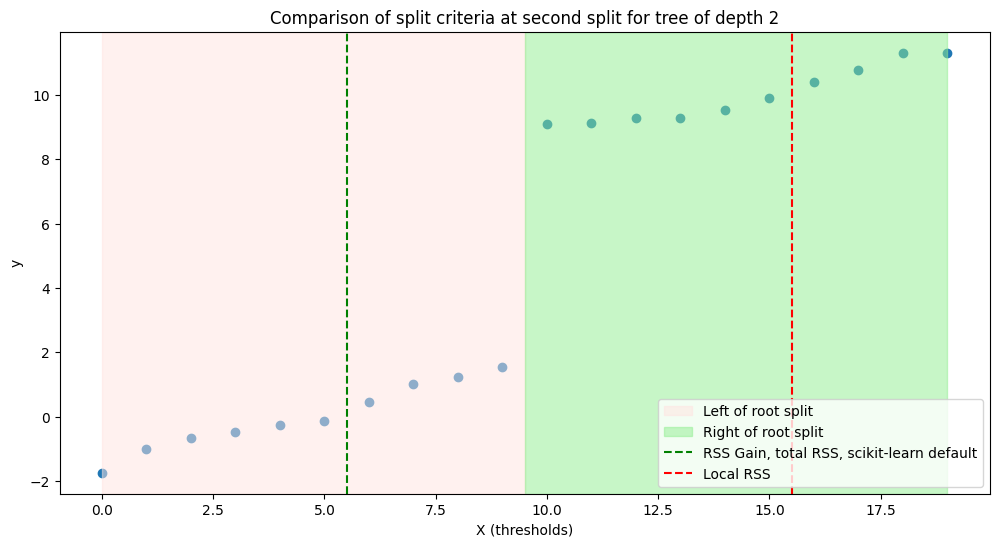

In [85]:
plt.figure(figsize=(12, 6))
plt.scatter(X_flat, y_flat)

# Plane colors
plt.axvspan(X_flat.min(), opt_root_split, color='mistyrose', alpha=0.5, label='Left of root split')
plt.axvspan(opt_root_split, X_flat.max(), color='lightgreen', alpha=0.5, label='Right of root split')

# Separation lines
plt.axvline(x=results_df['split'].iloc[1],
            color='g',
            linestyle='--',
            label='RSS Gain, total RSS, scikit-learn default')

plt.axvline(x=results_df['split'].iloc[0],
            color='r',
            linestyle='--',
            label='Local RSS')

# Legends etc.
plt.title('Comparison of split criteria at second split for tree of depth 2')
plt.xlabel('X (thresholds)')
plt.ylabel('y')

plt.legend(loc='lower right')
plt.show()
